# 실전 인터랙티브 데이터 시각화

분석할 데이터를 읽고, Bokeh 라이브러리를 사용하여 다양한 인터랙티브 시각화 만들기

## 서울 대기오염 자료를 통한 인터랙티브 데이터 시각화

데이터셋을 kaggle의 https://www.kaggle.com/bappekim/air-pollution-in-seoul 에서 발췌하였으며

동일한 자료를 서울열린데이터광장에서도 다운로드 가능합니다.

데이터 파일을 읽는 과정은 https://www.kaggle.com/seriousran/eda-ing 를 참고하였습니다.

**데이터 제공형태**

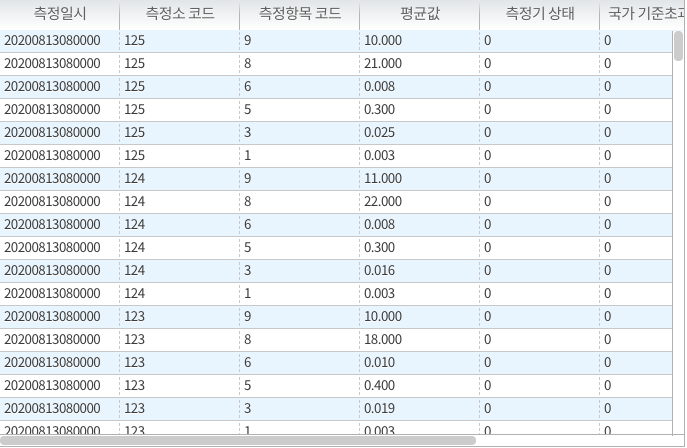

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show
output_notebook()

from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/gdrive')


Mounted at /content/drive
Mounted at /content/gdrive


### 데이터 파일 읽기

In [ ]:
data1 = pd.read_csv("/content/gdrive/My Drive/kaggle/AirPollutionSeoul/Original Data/Measurement_info.csv")
data1

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0
...,...,...,...,...,...
3885061,2019-12-31 23:00,123,9,13.000,0
3885062,2019-12-31 23:00,118,9,24.000,0
3885063,2019-12-31 23:00,105,8,19.000,0
3885064,2019-12-31 23:00,125,3,0.037,0


In [ ]:
data2 = pd.read_csv("/content/gdrive/My Drive/kaggle/AirPollutionSeoul/Original Data/Measurement_item_info.csv")
data2

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [ ]:
data3 = pd.read_csv("/content/gdrive/My Drive/kaggle/AirPollutionSeoul/Original Data/Measurement_station_info.csv")
data3

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


In [ ]:
df_summary = pd.read_csv("/content/gdrive/My Drive/kaggle/AirPollutionSeoul/Measurement_summary.csv")
df_summary
# 주소와 환경수치를 통합한 summary 데이터가 있어서 이 데이터로 진행
# PM10 수치를 미세먼지 농도
# PM2.5 수치를 초미세먼지농도로 사용

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


### 데이터 전처리

In [ ]:
# 날짜와 시간 부분을 각각 분리
date_time = df_summary['Measurement date'].str.split(" ", n=1, expand=True)
date_time.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [ ]:
# 날짜와 시간을 각각 df_summary에 넣어주고 기존에 있던 값은 drop함.
# 열 순서 재정렬
df_summary['date'] = date_time[0]
df_summary['time'] = date_time[1]
#df_summary = df_summary.drop(['Measurement date'], axis=1)
df = df_summary.reindex(columns=['date','time','Station code','Address', 'Latitude','Longitude','SO2','NO2','O3','CO','PM10','PM2.5'])
df.head()

,date,time,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01,01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01,02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01,03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01,04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [179]:
# 날짜에 대해 groupby하고 평균값을 통해 데이터를 관찰
df_mean = df.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_mean.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


### 인터랙티브 데이터 시각화

여기부터는 제가 직접 bokeh를 통해 진행하였습니다.

미세먼지(PM10) 기준으로 좋음, 보통, 나쁨, 매우나쁨으로 구분

대한민국의 미세먼지 환경기준(일평균)

* 좋음 0~30

* 보통 ~80

* 나쁨 ~150

* 매우나쁨151~

In [210]:
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.models.annotations import Span,Label

p=figure(plot_width=1000, plot_height=400, 
         x_axis_label='Date', y_axis_label='PM10')

datetime = np.asarray(df_mean['date'], dtype=np.datetime64)
value = np.asarray(df_mean['PM10'])
p.line(datetime,value,line_width=1,color=color,alpha=0.8)

good = Span(location=30, dimension='width', line_color='blue', line_width=4, line_alpha = 0.3)
p.add_layout(good)
soso = Span(location=80, dimension='width', line_color='green', line_width=4, line_alpha = 0.3)
p.add_layout(soso)
bad = Span(location=150, dimension='width', line_color='orange', line_width=4, line_alpha = 0.3)
p.add_layout(bad)

good_label = Label(x=1.52*10**12, y=30, text='Good', text_baseline='middle')
soso_label = Label(x=1.52*10**12, y=80, text='Soso', text_baseline='middle')
bad_label = Label(x=1.52*10**12, y=150, text='Bad', text_baseline='middle')
p.add_layout(good_label)
p.add_layout(soso_label)
p.add_layout(bad_label)


show(p)